# A Greedy Knapsack Heuristic

Motivated by ideal items having big value and small size

For $n$ items with values $v_i$ and weight $w_i$

Sort by:
$$
\frac{v_1}{w_1} \geq \frac{v_2}{w_2} \geq \frac{v_3}{w_3} \geq \cdots \frac{v_n}{w_n}
$$

Then pack items in this order until as many items are possible are packed.

To deal with edge cases, we return either the solution above, or the maximum value item, whichever is better

Note that this is similar in style to the scheduling problem covered in Week 1 of Greedy Algorithms.

## Performance Guarantee

Theorem: the value of this 3-step greedy solution is always $\geq 50\%$ of an optimal solution.

### Greedy Fractional Solution

Consider a "greedy fractional solution". After arriving at a solution through the greedy heurisitic, take a proportion of the remaining items with fractional weights and proportional values. 

Claim that the fractional solution is at least as good as every non-fractional feasible solution.

1. Let $S=$ an arbitrary feasible solution.

2. Suppose $l$ using of knapsack filled by $S$ with items not packed by the greedy fractional solution.

3. There mustbe at least $l$ units of knapsack filled by greedy functional solution not packed by $S$.

4. By the greedy criterion, items in 3 have larger ratios than those in 2

5. total value of greedy fractioanal solution at least that of $S$



### Analysis of Greedy Heuristic

In step 2, suppose the greedy algorithm picks the first $k$ values.

Therefore,
$$
\text{value of greedy algorihtm} \geq \text{total value of} \; 1^{\text{st}} \; k \; \text{items}
$$
And by step 3,
$$
\text{value of greedy algorihtm} \geq \text{value of} \; (k+1)^{\text{th}} \; \text{item}
$$

This implies
$$
\begin{aligned}
2 \times \text{value of greedy algorithm} &\geq \text{total value of} \; 1^{\text{st}} \; k+1 \; \text{items} \\
&\geq \text{total value of greedy fractional solution} \\
&\geq \text{optimal knapsack problem}
\end{aligned}
$$

Therefore
$$
\text{value of greedy algorithm} \geq \frac{1}{2} \;\text{optimal knapsack problem}
$$


### Special Cases

Suppose: every item $i$ has size $w_i \leq 10\%$ of knapsack capacity $W$. The consequence of this is that when the algorithm halts, the knapsack is more than $90\%$ full.
$$
\begin{aligned}
\implies \text{value of greedy algorithm} &\geq 90\% \; \text{greedy fractional solution} \\
&\geq 90\% \; \text{optimal knapsack problem}
\end{aligned}
$$

# A Dynamic Programming Heuristic for Knapsack

We aim to let the user specify a paramter $\epsilon > 0$ such that the algorithm garuntees a $(1 - \epsilon)$ approximation.

As $\epsilon$ decreases, we expect the running time to increase

## High Level Idea

We can try to solve a slightly incorrect bu easier knapsack instance.

Recall that is $w_i$ and $W$ are integers, the knapsack problem can be solved via dynamic programming in $O(nW)$ time.

Alternatively, if $v_i$ are integers, we can solve knapsack via dynamic programming in $O(n^2v_{max})$ time where $v_{max} = \max_{i}{v_i}$

Plan: throw out lower-order bits of the $v_i$

## Algorithm

1. Round each $v_i$ down to the nearest multiple of $m$ where $m$ depends on $\epsilon$
2. Divide the results by $m$ to get $\hat{v}_{i}$
$$
\hat{v}_{i} = \left\lfloor \frac{v_i}{m} \right\rfloor
$$

3. Use dynamic programming to solve the knapsack instance with values $\hat{v}_{i}$

## Knapsack when $v \in \mathbb{Z}$

We will assume that all $v_i$ are integers. This aims give an algorithm that gives a running time of
$$
O(n^2v_{max})
$$

### Subproblem and Recurrence

For $i=0, 1, 2, \cdots, n$ and $x=0, 1, 2, \cdots, n \cdot v_{max}$:

Define $S_{i, x}$ = minimum total size required to achieve value $\geq x$ while using only the first $i$ items, or $+\infty$ if its impossible

Then,
$$
S_{i, x} = \min\begin{cases}
S_{(i-1), x} & \text{Case 1: item} \; i \; \text{not used} \\
w_i + S_{(i-1), (x - v_i)} & \text{Case 2: item} \; i \; \text{used}
\end{cases}
$$

Similarly if $v_i \geq x$
$$
S_{k, (x - v_i)} = 0
$$

```
Let A = 2D array

A[0, 0] = 0
A[0, x] = + inf

For i = 0 to n:
    For x = 0 to n x vmax:

        A[i,x] = min(
            A[i-1, x]
            w_i + A[i-1, x - v_i]
        )

Return the largest X such that A[n, x] <= W
```

## Analysis of Dynamic Programming Heurisitc

Suppose we round $v_i$ to the value $\hat{v}_{i}$. Then
$$
v_i -m \leq m \times \hat{v}_{i} \leq v_i
$$

Let $S^*$ be the optimal solution and $S$ be the heuristic solution. Then
$$
\sum_{i \in S}{\hat{v}_{i}} \geq \sum_{i \in S^*}{\hat{v}_{i}}
$$
Since $S$ is optimal only for $\hat{v}_{i}$.

Applying the inequalities to get a lower bound for the heuristic score
$$
\begin{aligned}
\sum_{i \in S}{\hat{v}_{i}} &\geq \sum_{i \in S^*}{\hat{v}_{i}} \\[10pt]
m\sum_{i \in S}{\hat{v}_{i}} &\geq m\sum_{i \in S^*}{\hat{v}_{i}} \\[10pt]
\sum_{i \in S}{v_i} \geq m\sum_{i \in S}{\hat{v}_{i}} &\geq m\sum_{i \in S^*}{\hat{v}_{i}} \geq \sum_{i \in S^*}{(v_i - m)} \\[10pt]
\sum_{i \in S}{v_i} &\geq \sum_{i \in S^*}{v_i} - m \times \lvert S^* \rvert \\[10pt]
&\geq \sum_{i \in S^*}{v_i} - mn
\end{aligned}
$$

Considering that we need
$$
\sum_{i \in S}{v_i} \geq (1-\epsilon)\sum_{i \in S^*}{v_i} \\[10pt]
\implies \sum_{i \in S^*}{v_i} - mn \geq \sum_{i \in S^*}{v_i} - \epsilon\sum_{i \in S^*}{v_i} \\[10pt]
\implies \epsilon\sum_{i \in S^*}{v_i} \geq mn
$$

It would be sufficient to set
$$
mn = \epsilon v_{max} \\[10pt]
\implies m = \frac{\epsilon v_{max}}{n}
$$

## Running Time Analysis

We apply this bound for $m$ to the running time of $O(n^2\hat{v}_{max})$

$$
\hat{v}_{max} \leq \frac{v_{max}}{m} = v_{max} \times \frac{n}{\epsilon v_{max}} = \frac{n}{\epsilon} 
$$

Therefore the running time is bounded by
$$
O\left(\frac{n^3}{\epsilon}\right)
$$

# Programming Assingment

## 1

In this assignment we will revisit an old friend, the traveling salesman problem (TSP). This week you will implement a heuristic for the TSP, rather than an exact algorithm, and as a result will be able to handle much larger problem sizes.

Here is a data file "Week 3 nn.txt" describing a TSP instance [original source](http://www.math.uwaterloo.ca/tsp/world/bm33708.tsp).

The first line indicates the number of cities. Each city is a point in the plane, and each subsequent line indicates the $x$ and $y$ coordinates of a single city.

The distance between two cities is defined as the Euclidean distance --- that is, two cities at locations $(x,y)$ and $(z,w)$ have distance 
$$
\sqrt{(x-z)^2 + (y-w)^2}
$$
​
between them.

You should implement the nearest neighbor heuristic:

1. Start the tour at the first city. 
2. Repeatedly visit the closest city that the tour hasn't visited yet. 
    - In case of a tie, go to the closest city with the lowest index. 

    - For example, if both the third and fifth cities have the same distance from the first city (and are closer than any other city), then the tour should begin by going from the first city to the third city. 

3. Once every city has been visited exactly once, return to the first city to complete the tour. 

In the box below, enter the cost of the traveling salesman tour computed by the nearest neighbor heuristic for this instance, rounded down to the nearest integer.

[Hint: when constructing the tour, you might find it simpler to work with squared Euclidean distances (i.e., the formula above but without the square root) than Euclidean distances.  But don't forget to report the length of the tour in terms of standard Euclidean distance.]

In [2]:
import numpy as np

def load_data():
    with open('Week 3 nn.txt') as f:
        num_cities = next(f)
        return int(num_cities), [
            [float(x) for x in coord.split(" ")][1:]
            for coord in f
        ]

In [3]:
import matplotlib.pyplot as plt

def plot(coords, edges=[]):
    fig, ax = plt.subplots()
    
    x = [coord[0] for coord in coords]
    y = [coord[1] for coord in coords]

    for edge in edges:
        pt1, pt2 = edge
        ax.plot(pt1, pt2, color='orange')
        
    ax.scatter(x, y)

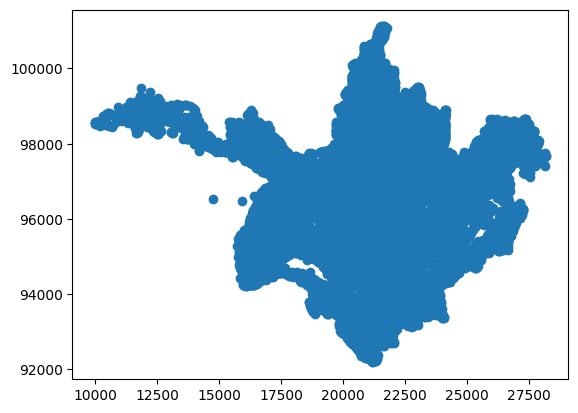

In [4]:
num_cities, coords = load_data()
plot(coords)

In [14]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next: 'Node' | None = None
        self.prev: 'Node' | None = None
    
    def __repr__(self):
        return repr(self.data)
    
class DoublyLinkedList:
    def __init__(self, nodes: list | None =None):
        self.head = None

        if nodes is not None:
            node = Node(data=nodes[0])
            self.head = node
            
            for elm in nodes[1:]:
                new_node = Node(data=elm)

                node.next = new_node
                new_node.prev = node

                node = node.next
    
        return
    
    def __repr__(self):
        node = self.head
        nodes = []

        while node is not None:
            nodes.append(repr(node.data))
            node = node.next
        nodes.append("")

        return "\n-> ".join(nodes)
    
    def __iter__(self):
        node = self.head
        while node is not None:
            yield node
            node = node.next


    def delete(self, node: 'Node'):
        
        next = node.next
        prev = node.prev

        if node == self.head:
            self.head = next
        
        if prev is not None:
            prev.next = next
        if next is not None:
            next.prev = prev

        return

In [94]:
import math

def tspHeuristic(num_cities, coords: list):
    
    progressCounter = 0

    # set up linked list for constant time deletion
    linkedList = DoublyLinkedList(coords)
    
    start = linkedList.head
    
    total_dist = 0
    head = start

    while True:
        
        print(f'{progressCounter} / {num_cities}', end="\r")
        
        linkedList.delete(head)
        if linkedList.head == None:
            break
        
        curr_closest_dist = np.inf
        curr_closest_node = None

        for coord in linkedList:
            x, y = coord.data
            delta_x = x - head.data[0]

            if delta_x < -curr_closest_dist:
                continue
            elif delta_x > curr_closest_dist:
                break
            
            dist = math.sqrt(delta_x**2 + (head.data[1] - y)**2)
            
            if dist < curr_closest_dist:
                curr_closest_node = coord
                curr_closest_dist = dist

        head = curr_closest_node
        progressCounter += 1
        total_dist += curr_closest_dist

    total_dist += math.sqrt((start.data[0] - head.data[0])**2 + (start.data[1] - head.data[1])**2)

    return total_dist

In [95]:
tspHeuristic(num_cities, coords)

1203406.5012708856

In [88]:
import math
import os

def test_tsp(filename: str) -> bool: 
    with open(filename) as f:
        num_cities = int(next(f))

        coords = []
        answer = None
        for coord in f:
            entries = coord.split(" ")

            if entries[0] == "//":
                answer = float(entries[1])
            else:
                coords.append([float(entries[1]), float(entries[2])])
    
    coords.sort(key= lambda x: x[0])

    value = tspHeuristic(num_cities, coords)
    passed = math.isclose(value, answer, rel_tol=0.01)

    print("-----------------")
    print(f'{"Passed" if passed else "FAILED"}')
    print(f"Output: {value}")
    print(f"Answer: {answer}")

    return passed

def test_all():
    grading = {}
    for file in os.listdir('Week 3 Tests'):
        passed = test_tsp(os.path.join('Week 3 Tests', file))
        grading[file] = passed

    return grading

In [96]:
test_all()

# since were sorting maybe the breaking ties 
# via index is causing the difference in score

-----------------
Passed
Output: 22.99408261315316
Answer: 23.0
-----------------
FAILED
Output: 7384.978565071086
Answer: 7631.0
-----------------
Passed
Output: 21148.888627231227
Answer: 21055.0
-----------------
FAILED
Output: 28986.277111127332
Answer: 29777.0
-----------------
Passed
Output: 987.4637857818376
Answer: 990.0
-----------------
FAILED
Output: 644795.8075607053
Answer: 654724.0
-----------------
Passed
Output: 15.23606797749979
Answer: 15.2361


{'test1.txt': True,
 'test2.txt': False,
 'test3.txt': True,
 'test4.txt': False,
 'test5.txt': True,
 'test6.txt': False,
 'test7.txt': True}